In [ ]:
import os
from langchain.chat_models import  init_chat_model
import getpass
os.environ["GOOGLE_API_KEY"] = ""
llm = init_chat_model("google_genai:gemini-2.0-flash")

In [2]:
from typing import Annotated

# from langchain_tavily import TavilySearch
from langchain_core.tools import tool
from typing_extensions import TypedDict

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

from langgraph.types import Command, interrupt

In [3]:
class State(TypedDict):
    messages : Annotated[list, add_messages]
    subject: str
graph_builder = StateGraph(State)

In [4]:
def write_email(state: State):
    """Write an email for the user according to the given information."""
    user_message = state['subject']  # Direct from input, works on first node
    response = llm.invoke(f"Write an email about: {user_message}")
    return {"messages": [response]}  # Message added to messages field

In [5]:
graph_builder.add_node("write_email", write_email)

In [6]:
graph_builder.set_entry_point("write_email")

In [7]:
chain = graph_builder.compile()

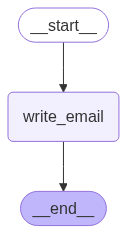

In [8]:
from IPython.display import Image, display
display(Image(chain.get_graph().draw_mermaid_png()))

In [ ]:
user_input = input()
# input("write an email for refering an intern to the manager? ")
result = chain.invoke({"subject": user_input})
print("Assistant:", result["messages"][-1].content)

Assistant: Subject: Referral for [Internship Name] - [Candidate Name]

Dear [Manager's Name],

I hope this email finds you well.

I'm writing to refer [Candidate Name] for the [Internship Name] internship position. I believe [he/she/they] would be a valuable asset to the team.

I know [Candidate Name] through [How you know the candidate - e.g., university coursework, a mutual friend, a previous project].  During [mention the context where you know the candidate], I was particularly impressed by [his/her/their] [mention specific skills or qualities - e.g., strong problem-solving abilities, excellent communication skills, enthusiasm for learning, specific technical skill like Python or Data Analysis].

Specifically, [Provide a concrete example of the candidate demonstrating the skill you mentioned. E.g., "In our group project for [Course Name], [he/she/they] took the lead on [specific task] and demonstrated a strong understanding of [relevant concept]." or "During our collaboration on [P